# Проект: Защита персональных данных клиентов

## Описание проекта

В данном проекте нужно защитить данные клиентов страховой компании. Необходимо разработать такой метод преобразования данных, чтобы по ним было легко восстановить персональную информацию и обосновать корректность его работы.

Нам нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи. Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## План работы

1. Загрузка данных
2. Умножение матриц
Ответить на вопрос: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? a. Изменится. b. Не изменится.
3. Алгоритм преобразования 
Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется. Запрограммировать этот алгоритм, применив матричные операции. 
4. Проверка алгоритма
Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## Выводы:

<b> Качество линейной регрессии не отличается до и после преобразования.

## 1. Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from numpy import linalg  as LA
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data['Возраст'] = data['Возраст'].astype('int')
data['Зарплата'] = data['Зарплата'].astype('int')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int32
 2   Зарплата           5000 non-null   int32
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int32(2), int64(3)
memory usage: 156.4 KB


In [7]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [8]:
data.duplicated().sum()

153

In [9]:
data = data.drop_duplicates()

In [10]:
data.duplicated().sum()

0

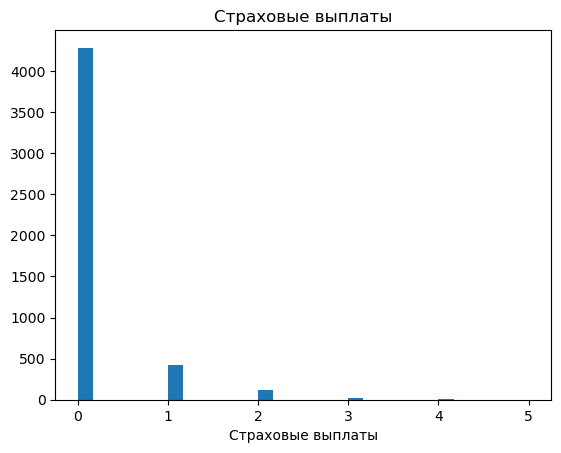

In [11]:

plt.hist(data['Страховые выплаты'], bins=30)
plt.title('Страховые выплаты')
plt.xlabel('Страховые выплаты')

plt.show()

<b> В данном разделе загрузил и изучил данные. 
Проверил на дубликаты, и удалил имеющиеся. 
Привел все данные к типу "int". 
Изучил целевой признак (страховые выплаты). Судя по гистограмме страховых выплат мало (меньше 500 это примерно 10%)

## 2. Умножение матриц

Чтобы записать формулу внутри текста, окружите её символами доллара `$`; если  снаружи — двойными символами `$$`. Эти формулы записываются на языке вёрстки _LaTeX_.
Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ**: При умножении матрицы признаков на обратимую матрицу, качество линейной регресии не изменится.

**Обоснование:** ...
Предположим, что M обратима. Тогда
Ax=b подразумевает MAx=Mb подразумевает M−1MAx=M−1Mb подразумевает Ax=b. 
M является обратимым. Тогда
A x = b⟹ M A x = M b⟹M−1 M A x =M−1 M b⟹A x = b.

Взято  из https://math.stackexchange.com/questions/2340563/how-to-prove-that-multiplying-the-equation-ax-b-from-the-left-with-invertibl

## 3. Алгоритм преобразования

**Алгоритм**
Задача проанализировать предложенный алгоритм преобразования данных и проверить предудыщий вывод - что качество линейной регрессии не поменяется. 
1. Генерирую произвольную обратимую матрицу
2. Параметры линейной регрессии обозначаю в переменных (целевой признак, остальные признаки)
3. Обучаю модель и найду значенние R2 на модели.
4. Затем умножаю обратную матрицу на матрицу признаков.
5. Обучаю модель на новых данных  и найду значение R2 на обученной модели
6. В конце сравнваю результаты первоначальной и конечной метрик R2

**Обоснование**

Умножаю признаки на произвольную обратимую матрицу и сравниваю результаты метрики R2 до умножения и после.

## 4. Проверка алгоритма

In [12]:
# Удаляю столбец, создаю признаки и таргет
features = data.drop('Страховые выплаты', axis=1).values
target = data['Страховые выплаты'].values

In [13]:
# Функция np.random.normal() находит нормальное распределение для случайных выборок.
M_random =np.random.normal(size = (4,4)) 
M_random

array([[ 1.24371347,  0.05006826,  0.72077167,  0.08314298],
       [ 0.66418467, -0.54199898,  1.41762804, -0.43890531],
       [-0.7775328 , -0.45769605, -1.14683241, -0.29978527],
       [ 0.15299112,  1.32768628,  1.18296022, -0.07685656]])

In [14]:
# инвертирую матрицу (вычисляю обратную (мультипликативную) матрицу).
LA.inv(M_random)

array([[ 1.31688605, -0.21370298,  0.65528621,  0.08899762],
       [ 0.48282581, -0.42299205,  0.55958105,  0.75521043],
       [-0.7865213 ,  0.46482037, -0.8773723 , -0.08304516],
       [-1.14382353, -0.57810781, -2.53323177, -1.06615153]])

In [15]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print('R2 на исходных признаках:',r2_score(target, predictions))

R2 на исходных признаках: 0.4302010046633359


In [16]:
M_new = features @ M_random
model.fit(M_new, target)
predictions = model.predict(M_new)
print('R2 на преобразованных признаках:',r2_score(target, predictions))

R2 на преобразованных признаках: 0.43020100466334277


## Вывод: 


<div class="alert alert-block alert-info">
Качество линейной регрессии не отличается до и после преобразования. Что и требовалось доказать.
    </div>